# **Beyond the Surface**
#### *Machine Learning for Predicting Well Status in Tanzania*

## **Business Understanding**
### **Background**
In a nation where one third of the country is arid to semi-arid, access to basic water has been a constant challenge over many years. From around the 90s to early 2000s, Tanzania's water supply and sanitation was characterised by decreasing access to at least basic water sources especially in urban areas, steady access to some form of sanitation, intermittent water supply and generally low quality of service.

Other than the three major lakes in the region, ground water has been the major source of water for the nation's people. In 2006, the Government of Tanzania adopted a National Water Sector Development Strategy that aimed to promote integrated water resources management and the development of urban and rural water supply. Since it's adoption, Tanzania has made significant progress improving the access of thousands of citizens.

Despite efforts by the Tanzanian Government to deal with this issue, it has proved to be difficult mainly due to lack of resources. According to the [Tanzania_Economic_Update_2023](https://www.worldbank.org/en/country/tanzania/publication/tanzania-economic-update-universal-access-to-water-and-sanitation-could-transform-social-and-economic-development) by World Bank Group, only 61% of households in Tanzania currently have access to a basic water-supply, a great improvement from the 2000s but also there's still room for improvement.

When it comes to resources, the Tanzanian water sector remains heavily dependent on external donors with 88% of the available funds being provided by external donor organisations. However, results have been mixed. For example, a report by GIZ notes that "despite heavy investments brought in by the World Bank and the European Union, the utility serving Dar es Salaam has remained one of the worst performing water entities in Tanzania." this is cited on [WikiPedia](https://en.wikipedia.org/wiki/Water_supply_and_sanitation_in_Tanzania).

### **Project Overview**
The Government of Tanzania is constantly trying to increase the percentage of the water access in the country, however, this percentage is constantly being dragged downwards due to lack of well routine maintenance or follow-ups. 

The goal of this project is to help the Government keep a track of the functionality status of the wells across the country, whether they are functional, need repair or non-functional to help them maintain them and build more to achieve 100% access to clean, potable water across Tanzania.

### **Project Objectives**
This project seeks to:
- Develop a machine learning model that predicts whether a well is:
    - *Functional*

    - *Non-functional*

    - *Functional but needs repair*

- Achieve a target classification accuracy of **at least 85%**.

- Identify key features (e.g., what kind of pump is operating, when it was installed, how it is managed) that drive well functionality.

- Support national water development by identifying underperforming or non-functional wells using data science tools.

- Develop a blueprint system that can be adapted for similar water access initiatives globally.

### **Stakeholders**
- *The Tanzanian Government*: By predicting which wells are functiona, non functional or need repairs, the government can have a clear idea of where resources are needed the most and help them drive their Water Development Strategy even further and improve the country's water situation. 

- *External Donors*: These are individuals or institutions who provide resources to help the nation.

- *Non-Profit Organizations*: These are organizations looking to help.

- *Local Communities*: These are the people the wells help directly. 

### **In Scope**
- Exploratory Data Analysis (EDA) to understand key trends and relationships in the dataset.

- Data preprocessing: handling missing values, encoding categorical variables, and scaling numerical ones.

- Feature engineering: including interaction terms, and domain-specific transformations.

- Model development using classification algorithms: **Logistic Regression, Decision Trees, Random Forests**

- Model evaluation using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC.

- Model validation using k-fold cross-validation and hyperparameter tuning (GridSearchCV).

## **Data Understanding**
This section contains the data's initial exploration. It provides information about the source of the data, helps have a peek at the dataset to understand it's structure such as its shape, data types, etc. and also understand what kind of mess the data has, such as missing values, duplicated records, outliers, among other data integrity issues.

### **Data Source**
This project required a dataset that represents Tanzania's water systems updated and created by people who manage the said systems.

The data used in this project was sourced from [DrivenData's Tanzania Water Pumps competition](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). Who in turn sourced it from Taarifa, an open source platform that aggregates data from the Tanzania Ministry of Water and the Tanzanian Ministry of Water.

#### *Why is this dataset important to the project?*
- A dataset sourced from the country of interest is crucial as it provides accurate and relevant information specific to the project's context, leading to more reliable results, better insights, and more effective solutions.

- It allows for a deeper understanding of local nuances and avoids the pitfalls of applying generalized data from other regions.

- For machine learning projects such as this, using real-world data from the target country leads to more accurate predictions and better model performance.

- Using inappropriate data can lead to unintended consequences and ineffective interventions.

### **Mini Exploration**
In this section we are importing the necessary packages, loading the dataset and exploring the dataset lightly, checking its:
- shape

- data types

- data integrity issues

#### *Importing packages and loading datasets*

In [1]:
# import packages
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

This repository contains 3 datasets, the `Training_Set_Values.csv`, which contains the features/predictors, the `Training_Set_Labels.csv`, which contains the target variables and the `Test_Set_Values`, that contains the test values for testing for generalization.

In the next cell we are only loading the 2 train datasets as `X` and `y`.

In [2]:
# Load the datasets.
# The predictors.
X = pd.read_csv('../Data/Raw_Data/Training_Set_Values.csv')

# The target variable.
y = pd.read_csv('../Data/Raw_Data/Training_Set_Labels.csv')

In [3]:
# Preview predicting features.
print('Predictors')
X.head()

Predictors


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Preview target variables.
print('Target Variables')
y.head()

Target Variables


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


#### *Data Summary: shapes, data types*
This section checks the dataset's shape and data types, this is important as it will help in identifying if the data is sufficient for modeling or not. We'll also know what kind of data we will be working with.

- We are using the `.shape()` method to check the dataset's shape.

In [5]:
# Shape of the dataset
print("Rows, Columns:", X.shape)

Rows, Columns: (59400, 40)


The dataset contains 59400 rows and 40 columns, giving us enough records to predict wells functionalities across Tanzania.

- We are using the `.info()` method to retrieve a concise summary of the data.

In [6]:
# Data types and non-null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The dataset contains data stored in 3 data types, namely:

| Data Type | No. of columns |
| :------------:| :----------: |
| Object | 30 |
| Integer | 7 |
| Float | 3 |

So far, the only columns whose values have been stored in an inaccurate data type are `date_recorded` and `construction_year`.

#### *Checking Data Integrity Issues*
In this section we are looking to identify whether the data contains:
- Missing values

- Duplicated records

- Outliers

In [7]:
# Find total number and percentage of missing values.
# Retrieve sum of missing values.
missing = X.isnull().sum()

# Turn into percentage.
missing_percent = (missing / len(X)) * 100

# Store in a DataFrame.
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})

# Filter out columns that don't have missing values.
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percent
funder,3635,6.119529
installer,3655,6.153199
subvillage,371,0.624579
public_meeting,3334,5.612795
scheme_management,3877,6.526936
scheme_name,28166,47.417508
permit,3056,5.144781


The dataset has a lot of missing data, especially in the `scheme_name` column, and moderately low missing values in the other 6 columns.

In [8]:
# Find duplicate records.
duplicate_records = X.duplicated().sum()

print(f'The training dataset contains {duplicate_records} duplicate records')

The training dataset contains 0 duplicate records


The dataset has no duplicated records.

In the next cell we are creating a figure of boxplots to identify potential outliers in the dataset, they are generated for each numerical feature. Boxplots are effective visual tools for detecting values that deviate significantly from the central tendency of the data.

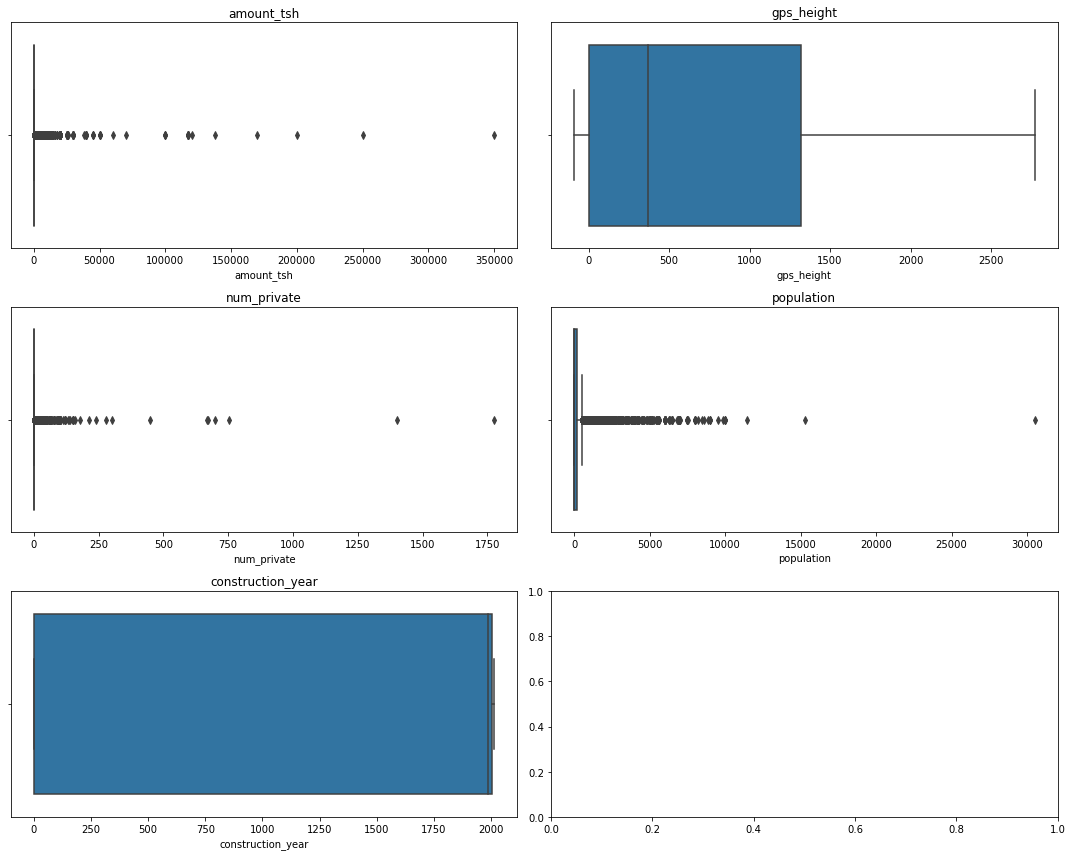

In [9]:
# Extract numerical columns
numerical_columns = X.select_dtypes(include='number').columns.tolist()

# Optional: Drop specific columns
cols_to_drop = ['id', 'longitude', 'latitude', 'region_code', 'district_code']
numerical_columns = [col for col in numerical_columns if col not in cols_to_drop]

# Number of plots needed
n = len(numerical_columns)
cols = 2  # Number of columns in subplot grid
rows = math.ceil(n / cols)  # Number of rows based on total plots

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4), sharey=False)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=X[col], ax=axes[i])
    axes[i].set_title(col)

fig.tight_layout()
plt.show()


From the boxplots above we identify that several features display noticeable outliers, particularly in columns like `amount_tsh`, `population`, and `gps_height`. These outliers may represent wells with unusual characteristics (e.g., extremely high water amounts or serving disproportionately large populations).

However it is important to note that not all outliers are necessarily bad data. In this context, they may represent wells in densely populated areas or regions with extreme topography. However, their presence could skew model performance if not handled appropriately.

A deeper dive will be conducted into specific variables with extreme values to assess whether these outliers reflect genuine variance in the data or data quality issues. This step will guide the final preprocessing decisions for modeling

- Next, we are using `.nunique()` method to check for unique values in every column.

In [10]:
# Check unique values for each column (useful for categorical vars)
X.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

More than half of the columns in the dataset contain a lot of unique values, this does not mean that they are bad data, in the next section, we will look into it further to understand what we are dealing with better.

#### *Descriptive Analysis*
We are using the `.describe()` method to generate a summary description of the data.

In [11]:
# Summary stats for numerical columns
X.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


From the statistical summary above, we confirm our boxplots' display that most of our numerical columns contain outliers. Some of the examples are:
- The `amount_tsh` column has a mean of 317.65 and a 75 percentile of 20, while its maximum value is 350,000.

- The `gps_height` column has a mean and a 75th percentile of 668.3 and 1319.25 respectfully, while its maximum value stands at 2770, almost three times the mean.

- The `num_private` column has a mean of 0.47, but a maximum value of 1776.

- The `population` column has a maximum population of 30,500 and a mean of 179.


### **Summary**
#### *Structure*
The dataset contains structured data stored in 59,400 rows and 40 columns, with records in 30 columns stored as objects, in 7 columns stored as integers and the other 3 columns contain records stored as floats.

The `y` dataset contains categorical data stored in one column and 59,400 rows.

#### *Data Issues and the Next Steps*
| Found                 |    Action                                                          |
| --------------------- | ------------------------------------------------------------------ |
| Missing values        | replace or drop                                                    |
| Wrong data types      | Convert using `pd.to_datetime`, `astype()`                         |
| Skewed distributions  | Use log/sqrt transforms                                            |
| Categorical issues    | Fix inconsistent labels (If any)                                   |

## **Data Cleaning**
In this section we are cleaning the dataset to prepare it for modeling. In the previous section, we performed the initial data exploration which not only helped in understanding the dataset but also pointing out some of the issues that could otherwise mislead the project's findings.

This is a crucial step for any project before training a machine learning model because it ensures the data is accurate, consistent, and relevant, leading to better model performance and more reliable predictions. Cleaning data helps remove errors, inconsistencies, and irrelevant information that can negatively impact the model's ability to learn and generalize.

This session will involve:
- Dealing with missing values

- Coverting records to their correct data types

- Dealing with categorical issues

- Identifying relevant columns based on domain knowledge

### **Missing Values**
During the data understanding, we found that 7 columns contain missing values, in this section, we are exploring the columns further to make sure there is no underlying reason other than the fact that the columns are incomplete.

The columns with missing values include: `funder`, `installer`, `subvillage`, `public_meeting`, `scheme_management`, `scheme_name`, `permit`.

#### *Exploring the columns*
The first step is visually scoping the columns to understand them better. We are filtering them out and storing them in a separate variable to enable easy access as examining them in a crowd of 40 columns would prove to be difficult.

In [14]:
# Filter the columns with the missing values to examine them closely.
missing_vals = X[['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']]

# Preview the columns
missing_vals

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


By visually scoping the columns, we notice that:
- All are stored as objects.

- `funder` and `installer` columns have some similarities, in the interest of the project, we are going to keep both.

In the next cell, we are exploring the columns that contain boolean valeus further, especially `public_meeting` column as it is not clear if it has any other value other than 'True'.

In [17]:
missing_vals['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

#### *Dealing with the missing values*
In this next session we are replacing the missing values with either the column's `mode`, `unknown` or `other` depending on the context of the column.

But as for the `scheme_name` column, we are dropping it as it contains null values in almost half of the records in the dataset. Keeping it would add noise to the dataset.

In [24]:
# Fill missing values with mode.
fill_mode = ['public_meeting', 'permit']

for x in fill_mode:
    X[x] = X[x].fillna(X[x].mode()[0])

# Fill missing values with 'other'
fill_other = ['funder', 'installer', 'scheme_management']

for y in fill_other:
    X[y] = X[y].fillna('other')

# Fill missing values using 'unknown'
X['subvillage'] = X['subvillage'].fillna('unknown')

# Drop scheme_name
X.drop(columns= ['scheme_name'], inplace= True)

In [ ]:
# Confirm there's no missing records.
X.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w